## Predict next word in an Irish Song

In [1]:
# import libraries

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Building the word vocabulary

In [2]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

### Generate tokens

In [3]:
# intialize tokenizer
tokenizer = Tokenizer()

# fit using the corpus
tokenizer.fit_on_texts(corpus)

# get word index
word_index = tokenizer.word_index


# plus 1 for the oov words
total_num_words = len(word_index) + 1

# print total number of words
print(total_num_words)

263


## Pre-Processing

In [4]:
sample = corpus[0]
print(sample)
print()

# print(word_index.get('town'))

sample_sequence = tokenizer.texts_to_sequences([sample])
print(sample_sequence)
print()

pad_sample = pad_sequences(sample_sequence, maxlen=total_num_words ,padding='pre')
print(pad_sample)

in the town of athy one jeremy lanigan 

[[4, 2, 66, 8, 67, 68, 69, 70]]

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  2 66  8 67 68 69 70]]


In [7]:
# input sequence
input_sequence = []

# just preparing using the first 2 sentences
# Loop over every line
for line in corpus[:2]:

    # Tokenize the current line and get the list of tokens
    # this will be feed into the input sequence
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)
    
    # generate n-gram sequence for each
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        print(n_gram_sequence)
        
        # append this n_gram_sequence to input_sequence
        input_sequence.append(n_gram_sequence)
    print()
    
print(input_sequence)
print()

# - Now these input sequences needs to be padded so that they all have the same length
# - This can be done using pad_sequences
# - lets generate the input sequences for all the lines in the corpus

# using padding as pre so that for every n-gram, we will be using the last token as the label
# for [4, 2, 66] : [4,2] will be use to predict 66 and so on

## for the max_len, we should find the length of the longest sentence in the input sequence
max_len = max([len(x) for x in input_sequence])
print('MAx length : {}'.format(max_len))

pad_input = pad_sequences(input_sequence, maxlen=max_len, padding='pre')
print('Pad inputs')
print(pad_input)

# Now from these pad_input sequences, we will need to get the X's values and the y's values
# X's = pad_input[:, :-1]  --> all values except the last column which will be use as the labels
# y's = pad_input[:, -1] --> all values in the last column -- label for that correspding observation

X = pad_input[:, :-1]
y = pad_input[:, -1]

print('X values: ')
print(X)
print()
print('y values: ')
print(y)

# now that we have the input sequnces and the labels, we can then use NLP techniques to predict the next word
# before that we might need to convert the labels into one hot arrays
tf.keras.utils.to_categorical(y[:2], num_classes=total_num_words)

[4, 2, 66, 8, 67, 68, 69, 70]
[4, 2]
[4, 2, 66]
[4, 2, 66, 8]
[4, 2, 66, 8, 67]
[4, 2, 66, 8, 67, 68]
[4, 2, 66, 8, 67, 68, 69]
[4, 2, 66, 8, 67, 68, 69, 70]

[71, 40, 20, 21, 72, 3, 73]
[71, 40]
[71, 40, 20]
[71, 40, 20, 21]
[71, 40, 20, 21, 72]
[71, 40, 20, 21, 72, 3]
[71, 40, 20, 21, 72, 3, 73]

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73]]

MAx length : 8
Pad inputs
[[ 0  0  0  0  0  0  4  2]
 [ 0  0  0  0  0  4  2 66]
 [ 0  0  0  0  4  2 66  8]
 [ 0  0  0  4  2 66  8 67]
 [ 0  0  4  2 66  8 67 68]
 [ 0  4  2 66  8 67 68 69]
 [ 4  2 66  8 67 68 69 70]
 [ 0  0  0  0  0  0 71 40]
 [ 0  0  0  0  0 71 40 20]
 [ 0  0  0  0 71 40 20 21]
 [ 0  0  0 71 40 20 21 72]
 [ 0  0 71 40 20 21 72  3]
 [ 0 71 40 20 21 72  3 73]]
X values: 
[[ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  4  2]
 [ 0  0 

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

### PrePare data for the entire corpus

In [8]:
# input sequence
input_sequence = []

# Loop over every line
for line in corpus:

    # Tokenize the current line and get the list of tokens
    # this will be feed into the input sequence
    token_list = tokenizer.texts_to_sequences([line])[0]
#     print(token_list)
    
    # generate n-gram sequence for each
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
#         print(n_gram_sequence)
        
        # append this n_gram_sequence to input_sequence
        input_sequence.append(n_gram_sequence)
        
## get the max length
# the length of the longest input sequence
max_length = max([len(x) for x in input_sequence]) 

## get the padded sequences
padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='pre')

## get the X and y values
Xs = padded_input_sequence[:, :-1]
ys = padded_input_sequence[:,-1]

# now convert the labels using one hot embedding
ys = tf.keras.utils.to_categorical(ys, num_classes=total_num_words)

Let's see the result for the first line of the song. The particular line and the expected token sequence is shown in the cell below:

In [9]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
  token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)


sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]




Since there are 8 tokens here, you can expect to find this particular line in the first 7 elements of the xs that you generated earlier. If we get the longest subphrase generated, that should be found in xs[6]. See the padded token sequence below:


In [10]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {Xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([Xs[elem_number]])}')

token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']




If you print out the label, it should show 70 because that is the next word in the phrase (i.e. lanigan). See the one-hot encoded form below. You can use the np.argmax() method to get the index of the 'hot' label.


In [11]:
tokenizer.word_index['lanigan']

70

In [12]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 70


If you pick the element before that, you will see the same subphrase as above minus one word:

In [13]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {Xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([Xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [ 0  0  0  0  4  2 66  8 67 68]
decoded to text: ['in the town of athy one']
one-hot label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
index of label: 69


In [14]:
# reverting it back the code to texts
tokenizer.index_word[69]

'jeremy'

### Build the Model

In [16]:
embedding_dim = 64


model = tf.keras.models.Sequential([
    
    # minus 1 from max_length as we have removed the last column for setting labels
    Embedding(total_num_words, embedding_dim, input_length = max_length - 1),
    
    Bidirectional(LSTM(20)),
    Dense(total_num_words, activation = 'softmax' )
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 64)            16832     
                                                                 
 bidirectional (Bidirectiona  (None, 40)               13600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


Train the model

You can now train the model. We have a relatively small vocabulary so it will only take a couple of minutes to complete 500 epochs.


In [19]:
# fit the model

epochs = 500
model.fit(Xs, ys, epochs=epochs)

Epoch 1/500
15/15 [==============================] - 0s 12ms/step - loss: 4.5341 - accuracy: 0.0927
Epoch 2/500
15/15 [==============================] - 0s 12ms/step - loss: 4.5043 - accuracy: 0.0949
Epoch 3/500
15/15 [==============================] - 0s 13ms/step - loss: 4.4676 - accuracy: 0.1038
Epoch 4/500
15/15 [==============================] - 0s 12ms/step - loss: 4.4306 - accuracy: 0.0993
Epoch 5/500
15/15 [==============================] - 0s 13ms/step - loss: 4.3842 - accuracy: 0.1015
Epoch 6/500
15/15 [==============================] - 0s 11ms/step - loss: 4.3464 - accuracy: 0.1038
Epoch 7/500
15/15 [==============================] - 0s 14ms/step - loss: 4.3094 - accuracy: 0.1060
Epoch 8/500
15/15 [==============================] - 0s 12ms/step - loss: 4.2751 - accuracy: 0.1236
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.2333 - accuracy: 0.1258
Epoch 10/500
15/15 [==============================] - 0s 13ms/step - loss: 4.1889 - accuracy: 0.1325

15/15 [==============================] - 0s 11ms/step - loss: 1.7186 - accuracy: 0.7108
Epoch 83/500
15/15 [==============================] - 0s 13ms/step - loss: 1.6980 - accuracy: 0.7263
Epoch 84/500
15/15 [==============================] - 0s 12ms/step - loss: 1.6729 - accuracy: 0.7263
Epoch 85/500
15/15 [==============================] - 0s 13ms/step - loss: 1.6530 - accuracy: 0.7373
Epoch 86/500
15/15 [==============================] - 0s 11ms/step - loss: 1.6340 - accuracy: 0.7351
Epoch 87/500
15/15 [==============================] - 0s 10ms/step - loss: 1.6126 - accuracy: 0.7439
Epoch 88/500
15/15 [==============================] - 0s 12ms/step - loss: 1.5979 - accuracy: 0.7351
Epoch 89/500
15/15 [==============================] - 0s 13ms/step - loss: 1.5749 - accuracy: 0.7616
Epoch 90/500
15/15 [==============================] - 0s 11ms/step - loss: 1.5500 - accuracy: 0.7682
Epoch 91/500
15/15 [==============================] - 0s 12ms/step - loss: 1.5348 - accuracy: 0.7638
Epo

15/15 [==============================] - 0s 12ms/step - loss: 0.6587 - accuracy: 0.9205
Epoch 163/500
15/15 [==============================] - 0s 12ms/step - loss: 0.6517 - accuracy: 0.9227
Epoch 164/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6468 - accuracy: 0.9205
Epoch 165/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6383 - accuracy: 0.9249
Epoch 166/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6329 - accuracy: 0.9227
Epoch 167/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6255 - accuracy: 0.9272
Epoch 168/500
15/15 [==============================] - 0s 10ms/step - loss: 0.6199 - accuracy: 0.9272
Epoch 169/500
15/15 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.9294
Epoch 170/500
15/15 [==============================] - 0s 13ms/step - loss: 0.6061 - accuracy: 0.9316
Epoch 171/500
15/15 [==============================] - 0s 12ms/step - loss: 0.5998 - accuracy: 0

15/15 [==============================] - 0s 10ms/step - loss: 0.3226 - accuracy: 0.9536
Epoch 243/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3212 - accuracy: 0.9536
Epoch 244/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3187 - accuracy: 0.9536
Epoch 245/500
15/15 [==============================] - 0s 11ms/step - loss: 0.3163 - accuracy: 0.9514
Epoch 246/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3135 - accuracy: 0.9536
Epoch 247/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3116 - accuracy: 0.9492
Epoch 248/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3092 - accuracy: 0.9492
Epoch 249/500
15/15 [==============================] - 0s 13ms/step - loss: 0.3064 - accuracy: 0.9536
Epoch 250/500
15/15 [==============================] - 0s 10ms/step - loss: 0.3044 - accuracy: 0.9536
Epoch 251/500
15/15 [==============================] - 0s 7ms/step - loss: 0.3035 - accuracy: 0.

15/15 [==============================] - 0s 11ms/step - loss: 0.2439 - accuracy: 0.9448
Epoch 323/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2349 - accuracy: 0.9536
Epoch 324/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2242 - accuracy: 0.9492
Epoch 325/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2222 - accuracy: 0.9514
Epoch 326/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2176 - accuracy: 0.9470
Epoch 327/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2176 - accuracy: 0.9492
Epoch 328/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2324 - accuracy: 0.9514
Epoch 329/500
15/15 [==============================] - 0s 13ms/step - loss: 0.2716 - accuracy: 0.9338
Epoch 330/500
15/15 [==============================] - 0s 12ms/step - loss: 0.3226 - accuracy: 0.9227
Epoch 331/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2607 - accuracy: 0

15/15 [==============================] - 0s 11ms/step - loss: 0.1484 - accuracy: 0.9470
Epoch 403/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1483 - accuracy: 0.9470
Epoch 404/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1451 - accuracy: 0.9492
Epoch 405/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1481 - accuracy: 0.9514
Epoch 406/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1469 - accuracy: 0.9470
Epoch 407/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1452 - accuracy: 0.9470
Epoch 408/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1444 - accuracy: 0.9448
Epoch 409/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1432 - accuracy: 0.9470
Epoch 410/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1429 - accuracy: 0.9492
Epoch 411/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1414 - accuracy: 0

15/15 [==============================] - 0s 13ms/step - loss: 0.1191 - accuracy: 0.9448
Epoch 483/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1181 - accuracy: 0.9536
Epoch 484/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1184 - accuracy: 0.9426
Epoch 485/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1179 - accuracy: 0.9470
Epoch 486/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1217 - accuracy: 0.9492
Epoch 487/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1203 - accuracy: 0.9514
Epoch 488/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1178 - accuracy: 0.9492
Epoch 489/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1178 - accuracy: 0.9514
Epoch 490/500
15/15 [==============================] - 0s 12ms/step - loss: 0.1181 - accuracy: 0.9492
Epoch 491/500
15/15 [==============================] - 0s 13ms/step - loss: 0.1169 - accuracy: 0

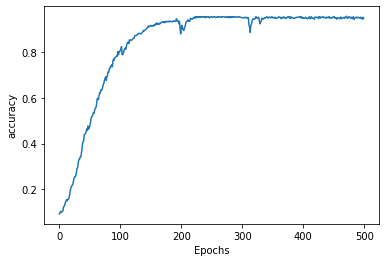

In [22]:
# Plot utility
import matplotlib.pyplot as plt

history = model.history

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')


### Generating Text

With the model trained, we can now use it to make its own song! The process would look like:

    Feed a seed text to initiate the process.
    Model predicts the index of the most probable next word.
    Look up the index in the reverse word index dictionary
    Append the next word to the seed text.
    Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. Lets see how it can be implemented below:

In [33]:
# Define seed text
seed_text = "Laurence went to Dublin"

# prepare the data for prediction
# test_tokenizer = Tokenizer()

# fit on test data
# test_tokenizer.fit_on_texts([seed_text])

# generate sequence
test_sequence = tokenizer.texts_to_sequences([seed_text])
print(test_sequence)

test_sample_pad = pad_sequences(test_sequence, maxlen=(max_length - 1), padding='pre')
probabilities = model.predict(test_sample_pad)
probabilities
# np.argmax(model.predict(test_sample_pad))

[[134, 13, 59]]
1/1 [==============================] - 0s 158ms/step


array([[4.77704930e-07, 2.59424880e-04, 5.18048037e-05, 1.17050213e-05,
        9.09430219e-06, 1.00273392e-04, 8.50146823e-03, 2.13871372e-05,
        3.56667042e-05, 3.31476087e-07, 2.24487806e-07, 1.29706186e-05,
        2.93748440e-06, 1.14314880e-05, 3.10691167e-03, 2.64151720e-04,
        3.26547846e-02, 5.91449775e-02, 3.44445696e-03, 4.07073712e-05,
        5.33023785e-06, 4.51569539e-03, 6.74329158e-06, 2.06620796e-04,
        2.39658952e-02, 8.30795558e-04, 3.35584544e-02, 3.60553131e-05,
        1.55442894e-01, 3.01802810e-03, 4.22426547e-06, 1.05835104e-04,
        2.17536235e-05, 4.92835306e-06, 4.92126383e-02, 4.58778704e-05,
        7.35316462e-07, 3.03895558e-06, 1.26207715e-05, 1.03521397e-05,
        8.25625248e-05, 3.18551683e-05, 2.07300158e-03, 2.15533175e-04,
        3.37782199e-04, 1.53391653e-07, 6.29058718e-07, 5.04327982e-05,
        3.62622319e-03, 3.04534449e-04, 3.29010457e-01, 7.27045303e-03,
        8.53420261e-06, 6.03389461e-04, 2.82616267e-04, 5.254789

In [34]:
predicted = np.argmax(probabilities, axis=-1)[0]
predicted

50

In [30]:
tokenizer.index_word[50]

'merry'

In [37]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=(max_length-1), padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result
print(seed_text)


1/1 [==============================] - 0s 35ms/step
Laurence went to Dublin merry and the was powerful and taras hall rose old the rat ask polkas mccarthy eyes mchugh creature the died lanigans ball ball ball ball of groups from under the table died new died new minute didnt eyes cried eyes nelly were we glisten glisten glisten glisten kinds long at me mavrone ground ground ground ground ground ground creature all nonsensical mchugh dolans eyes nelly were we glisten glisten glisten glisten glisten nelly went me at me all lashings ground at gave ground me a nonsensical polkas polkas polkas nonsensical polkas polkas eyes cheeks ground were glisten we rose rose


In the output above, we noticed frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, you will get the top three indices and choose one at random. See if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three. Feel free to improve it and of course, you can also develop your own method of picking the next word.

In [39]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=(max_length-1), padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice([1,2,3])

    # Sort the probabilities in ascending order 
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
      output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
      seed_text += " " + output_word

# Print the result
print(seed_text)

1/1 [==============================] - 0s 38ms/step
Laurence went to Dublin there were red got at for friends and punch ladies ladies nonsensical her gathered nelly of gathered a polkas rose your eyes ned rose rose glisten able banished were entangled nonsensical morgan eyes me cheeks me for all the ladies table ladies a cask polkas polkas your eyes glisten glisten glisten couples mavrone and ten academy academy nonsensical at academy academy polkas ned polkas banished were morgan old nonsense banished creature creature creature nelly casey think nelly mavrone all all nonsensical polkas peggy nelly round up mavrone to a academy strangled eyes sweetheart academy jig jig eyes mchugh lashings cheeks
